 # Hackerearth - Machine Learning Competition
 ### March, 2017
 
 # Data preprocessing

In [1]:
ID = 'member_id'
TARGET = 'loan_status'
DIRECTORY = 'C:/Users/Public/Hackerearth/1_MachineLearningChallenge_2017march/'
TRAIN_FILE = DIRECTORY + 'train_indessa.csv'
TEST_FILE = DIRECTORY +'test_indessa.csv'

# The provided training data will be splitted into these files (for training and local test):
TRAIN_ONEHOT = DIRECTORY + 'train_onehot.csv'
VALID_ONEHOT = DIRECTORY + 'valid_onehot.csv'

# The predictions will be made for this dataset:
TEST_ONEHOT = DIRECTORY + 'test_onehot.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import operator

### Load data

In [3]:
train = pd.read_csv(TRAIN_FILE)
test = pd.read_csv(TEST_FILE)

In [4]:
train.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [5]:
test.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,11937648,14000,14000,14000.0,60 months,BAT4711174,16.24,C,C5,Data Analyst,...,0.0,0.0,NaN,INDIVIDUAL,NaN,104th week,0.0,0.0,85230.0,45700.0
1,38983318,16000,16000,16000.0,60 months,BAT4318899,9.49,B,B2,Senior Database Administrator,...,0.0,0.0,NaN,INDIVIDUAL,NaN,57th week,0.0,0.0,444991.0,21400.0
2,27999917,11050,11050,11050.0,60 months,BAT446479,15.61,D,D1,Customer service representative,...,0.0,0.0,26.0,INDIVIDUAL,NaN,70th week,0.0,0.0,105737.0,16300.0
3,61514932,35000,35000,34700.0,60 months,BAT4664105,12.69,C,C2,ACCT OFFICER,...,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,287022.0,72400.0
4,59622821,6500,6500,6500.0,36 months,,6.89,A,A3,Paralegal,...,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,234278.0,26700.0


In [6]:
train.shape, test.shape

((532428, 45), (354951, 44))

In [7]:
# number of unique levels
for i in range(len(train.columns)):
    print(train.columns[i] + ' ' +str(len(train[train.columns[i]].unique())))

member_id 532428
loan_amnt 1370
funded_amnt 1370
funded_amnt_inv 6442
term 2
batch_enrolled 105
int_rate 535
grade 7
sub_grade 35
emp_title 190126
emp_length 12
home_ownership 6
annual_inc 33989
verification_status 3
pymnt_plan 2
desc 70639
purpose 14
title 39694
zip_code 917
addr_state 51
dti 4058
delinq_2yrs 27
inq_last_6mths 24
mths_since_last_delinq 148
mths_since_last_record 123
open_acc 74
pub_rec 29
revol_bal 63459
revol_util 1266
total_acc 127
initial_list_status 2
total_rec_int 243149
total_rec_late_fee 4073
recoveries 14024
collection_recovery_fee 12617
collections_12_mths_ex_med 10
mths_since_last_major_derog 163
application_type 2
verification_status_joint 4
last_week_pay 98
acc_now_delinq 9
tot_coll_amt 8082
tot_cur_bal 251641
total_rev_hi_lim 14698
loan_status 2


In [8]:
train['istrain'] = 1
test['istrain'] = 0
data = pd.concat([train, test], ignore_index = True)
data.shape

(887379, 46)

In [9]:
data.head()

,acc_now_delinq,addr_state,annual_inc,application_type,batch_enrolled,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,desc,dti,...,title,tot_coll_amt,tot_cur_bal,total_acc,total_rec_int,total_rec_late_fee,total_rev_hi_lim,verification_status,verification_status_joint,zip_code
0,0.0,FL,28700.0,INDIVIDUAL,,0.0,0.0,0.0,NaN,33.88,...,Debt consolidation,0.0,28699.0,28.0,1173.84,0.0,30800.0,Source Verified,NaN,349xx
1,0.0,MD,65000.0,INDIVIDUAL,BAT1586599,0.0,0.0,0.0,NaN,3.64,...,Home improvement,0.0,9974.0,13.0,83.95,0.0,32900.0,Source Verified,NaN,209xx
2,0.0,OH,45000.0,INDIVIDUAL,BAT1586599,0.0,0.0,0.0,NaN,18.42,...,Debt consolidation,65.0,38295.0,19.0,56.47,0.0,34900.0,Not Verified,NaN,447xx
3,0.0,VA,105000.0,INDIVIDUAL,BAT4808022,0.0,0.0,0.0,> My goal is to obtain a loan to pay off my hi...,14.97,...,Debt consolidation,0.0,55564.0,21.0,4858.62,0.0,24700.0,Not Verified,NaN,221xx
4,0.0,CA,52000.0,INDIVIDUAL,BAT2833642,0.0,0.0,0.0,NaN,20.16,...,refi,0.0,47159.0,27.0,2296.41,0.0,47033.0,Verified,NaN,900xx


In [10]:
data.columns

Index(['acc_now_delinq', 'addr_state', 'annual_inc', 'application_type',
       'batch_enrolled', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'delinq_2yrs', 'desc', 'dti',
       'emp_length', 'emp_title', 'funded_amnt', 'funded_amnt_inv', 'grade',
       'home_ownership', 'initial_list_status', 'inq_last_6mths', 'int_rate',
       'istrain', 'last_week_pay', 'loan_amnt', 'loan_status', 'member_id',
       'mths_since_last_delinq', 'mths_since_last_major_derog',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'purpose',
       'pymnt_plan', 'recoveries', 'revol_bal', 'revol_util', 'sub_grade',
       'term', 'title', 'tot_coll_amt', 'tot_cur_bal', 'total_acc',
       'total_rec_int', 'total_rec_late_fee', 'total_rev_hi_lim',
       'verification_status', 'verification_status_joint', 'zip_code'],
      dtype='object')

In [11]:
data.dtypes

acc_now_delinq                 float64
addr_state                      object
annual_inc                     float64
application_type                object
batch_enrolled                  object
collection_recovery_fee        float64
collections_12_mths_ex_med     float64
delinq_2yrs                    float64
desc                            object
dti                            float64
emp_length                      object
emp_title                       object
funded_amnt                      int64
funded_amnt_inv                float64
grade                           object
home_ownership                  object
initial_list_status             object
inq_last_6mths                 float64
int_rate                       float64
istrain                          int64
last_week_pay                   object
loan_amnt                        int64
loan_status                    float64
member_id                        int64
mths_since_last_delinq         float64
mths_since_last_major_der

In [12]:
# number of unique levels
for i in range(len(train.columns)):
    print(train.columns[i] + ' ' +str(len(train[train.columns[i]].unique())))

member_id 532428
loan_amnt 1370
funded_amnt 1370
funded_amnt_inv 6442
term 2
batch_enrolled 105
int_rate 535
grade 7
sub_grade 35
emp_title 190126
emp_length 12
home_ownership 6
annual_inc 33989
verification_status 3
pymnt_plan 2
desc 70639
purpose 14
title 39694
zip_code 917
addr_state 51
dti 4058
delinq_2yrs 27
inq_last_6mths 24
mths_since_last_delinq 148
mths_since_last_record 123
open_acc 74
pub_rec 29
revol_bal 63459
revol_util 1266
total_acc 127
initial_list_status 2
total_rec_int 243149
total_rec_late_fee 4073
recoveries 14024
collection_recovery_fee 12617
collections_12_mths_ex_med 10
mths_since_last_major_derog 163
application_type 2
verification_status_joint 4
last_week_pay 98
acc_now_delinq 9
tot_coll_amt 8082
tot_cur_bal 251641
total_rev_hi_lim 14698
loan_status 2
istrain 1


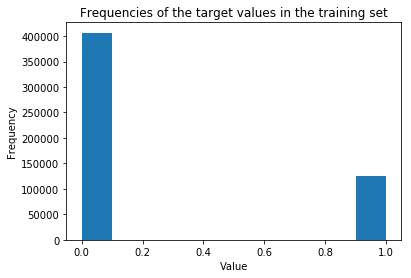

In [13]:
plt.hist(train[train.columns[-2]])
plt.title("Frequencies of the target values in the training set")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [14]:
print('Number of elements in class 0: ' + str(train[train[TARGET] == 0].shape[0]))
print('Number of elements in class 1: ' + str(train[train[TARGET] == 1].shape[0]))

Number of elements in class 0: 406601
Number of elements in class 1: 125827


In [15]:
# Check for missing values
data.apply(lambda x: sum(x.isnull()))

acc_now_delinq                     29
addr_state                          0
annual_inc                          4
application_type                    0
batch_enrolled                 130748
collection_recovery_fee             0
collections_12_mths_ex_med        145
delinq_2yrs                        29
desc                           761598
dti                                 0
emp_length                          0
emp_title                       51457
funded_amnt                         0
funded_amnt_inv                     0
grade                               0
home_ownership                      0
initial_list_status                 0
inq_last_6mths                     29
int_rate                            0
istrain                             0
last_week_pay                       0
loan_amnt                           0
loan_status                    354951
member_id                           0
mths_since_last_delinq         454312
mths_since_last_major_derog    665676
mths_since_l

In [16]:
# Calculate the rate of missing values

data.apply(lambda x: sum(x.isnull()) / len(x))

acc_now_delinq                 0.000033
addr_state                     0.000000
annual_inc                     0.000005
application_type               0.000000
batch_enrolled                 0.147342
collection_recovery_fee        0.000000
collections_12_mths_ex_med     0.000163
delinq_2yrs                    0.000033
desc                           0.858256
dti                            0.000000
emp_length                     0.000000
emp_title                      0.057988
funded_amnt                    0.000000
funded_amnt_inv                0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000033
int_rate                       0.000000
istrain                        0.000000
last_week_pay                  0.000000
loan_amnt                      0.000000
loan_status                    0.399999
member_id                      0.000000
mths_since_last_delinq         0.511971


## Drop variables with too much categories

In [17]:
data = data.drop(['batch_enrolled', 'emp_title', 'desc', 'title'], axis = 1)
data.columns

Index(['acc_now_delinq', 'addr_state', 'annual_inc', 'application_type',
       'collection_recovery_fee', 'collections_12_mths_ex_med', 'delinq_2yrs',
       'dti', 'emp_length', 'funded_amnt', 'funded_amnt_inv', 'grade',
       'home_ownership', 'initial_list_status', 'inq_last_6mths', 'int_rate',
       'istrain', 'last_week_pay', 'loan_amnt', 'loan_status', 'member_id',
       'mths_since_last_delinq', 'mths_since_last_major_derog',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'purpose',
       'pymnt_plan', 'recoveries', 'revol_bal', 'revol_util', 'sub_grade',
       'term', 'tot_coll_amt', 'tot_cur_bal', 'total_acc', 'total_rec_int',
       'total_rec_late_fee', 'total_rev_hi_lim', 'verification_status',
       'verification_status_joint', 'zip_code'],
      dtype='object')

In [18]:
nonnumeric_cols = data.dtypes[data.dtypes == 'object'].index.copy()
numeric_cols = data.dtypes[data.dtypes != 'object'].index.copy()
print(nonnumeric_cols)
print(numeric_cols)

Index(['addr_state', 'application_type', 'emp_length', 'grade',
       'home_ownership', 'initial_list_status', 'last_week_pay', 'purpose',
       'pymnt_plan', 'sub_grade', 'term', 'verification_status',
       'verification_status_joint', 'zip_code'],
      dtype='object')
Index(['acc_now_delinq', 'annual_inc', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'delinq_2yrs', 'dti', 'funded_amnt',
       'funded_amnt_inv', 'inq_last_6mths', 'int_rate', 'istrain', 'loan_amnt',
       'loan_status', 'member_id', 'mths_since_last_delinq',
       'mths_since_last_major_derog', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'recoveries', 'revol_bal', 'revol_util', 'tot_coll_amt',
       'tot_cur_bal', 'total_acc', 'total_rec_int', 'total_rec_late_fee',
       'total_rev_hi_lim'],
      dtype='object')


## Numerical variables

In [19]:
# Check for missing numerical values
data[numeric_cols].apply(lambda x: sum(x.isnull()))

acc_now_delinq                     29
annual_inc                          4
collection_recovery_fee             0
collections_12_mths_ex_med        145
delinq_2yrs                        29
dti                                 0
funded_amnt                         0
funded_amnt_inv                     0
inq_last_6mths                     29
int_rate                            0
istrain                             0
loan_amnt                           0
loan_status                    354951
member_id                           0
mths_since_last_delinq         454312
mths_since_last_major_derog    665676
mths_since_last_record         750326
open_acc                           29
pub_rec                            29
recoveries                          0
revol_bal                           0
revol_util                        502
tot_coll_amt                    70276
tot_cur_bal                     70276
total_acc                          29
total_rec_int                       0
total_rec_la

### acc_now_delinq

Number of missing values: 29
Number of unique values: 9


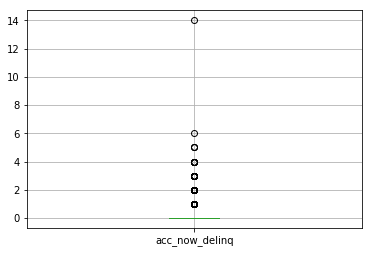

In [20]:
var = 'acc_now_delinq'
print('Number of missing values: ' + str(sum(data[var].isnull())))
print('Number of unique values: ' + str(len(data[var].unique())))
data.boxplot(column = var, return_type = 'axes')

In [21]:
print(data[var].value_counts())

0.0     883236
1.0       3866
2.0        208
3.0         28
4.0          7
5.0          3
6.0          1
14.0         1
Name: acc_now_delinq, dtype: int64


In [22]:
# The same value for more than 99.5 percent of examples, so drop variable
data.drop(var, axis = 1, inplace = True)

### annual_inc

Number of missing values: 4
Number of unique values: 49385


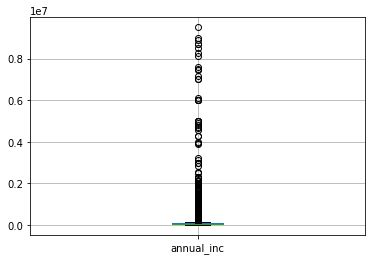

In [23]:
var = 'annual_inc'
print('Number of missing values: ' + str(sum(data[var].isnull())))
print('Number of unique values: ' + str(len(data[var].unique())))
data.boxplot(column=var, return_type='axes')

In [24]:
median_of_var = data[var].median()
median_of_var

65000.0

In [25]:
# Impute by median because only 4 missing:
data[var].fillna(median_of_var, inplace = True)

In [26]:
data[var].describe()

count    8.873790e+05
mean     7.502754e+04
std      6.469816e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64

In [27]:
# Take its logarithm because of skewness
data['log_annual_inc'] = np.log(1 + data[var])

# Drop variable 'annual_inc'
data.drop(var, axis = 1, inplace = True)

In [28]:
data['log_annual_inc'].describe()

count    887379.000000
mean         11.075042
std           0.528559
min           0.000000
25%          10.714440
50%          11.082158
75%          11.407576
max          16.066802
Name: log_annual_inc, dtype: float64

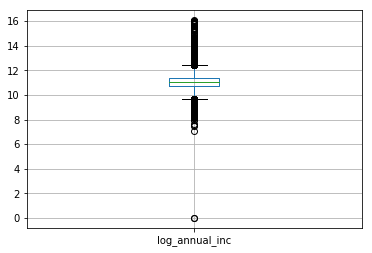

In [29]:
data.boxplot(column = 'log_annual_inc', return_type = 'axes')

### collection_recovery_fee

Number of missing values: 0
Number of unique values: 20679


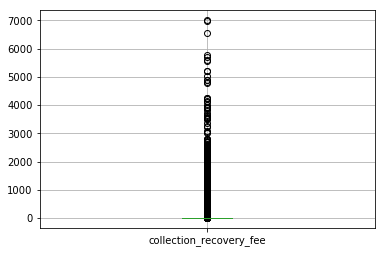

In [30]:
var = 'collection_recovery_fee'
print('Number of missing values: ' + str(sum(data[var].isnull())))
print('Number of unique values: ' + str(len(data[var].unique())))
data.boxplot(column = var, return_type = 'axes')

In [31]:
data[var].describe()

count    887379.000000
mean          4.880757
std          63.125281
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        7002.190000
Name: collection_recovery_fee, dtype: float64

### collections_12_mths_ex_med

Number of missing values: 145
Number of unique values: 13


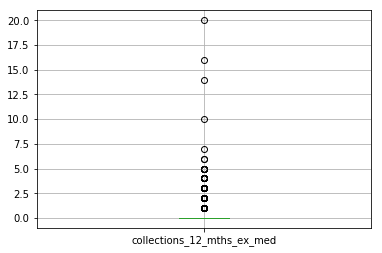

In [32]:
var = 'collections_12_mths_ex_med'
print('Number of missing values: ' + str(sum(data[var].isnull())))
print('Number of unique values: ' + str(len(data[var].unique())))
data.boxplot(column = var, return_type = 'axes')

In [33]:
data[var].describe()

count    887234.000000
mean          0.014380
std           0.134191
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          20.000000
Name: collections_12_mths_ex_med, dtype: float64

In [34]:
# Impute by median because only 145 missing:
data[var].fillna(0, inplace = True)

### delinq_2yrs

Number of missing values: 29
Number of unique values: 30


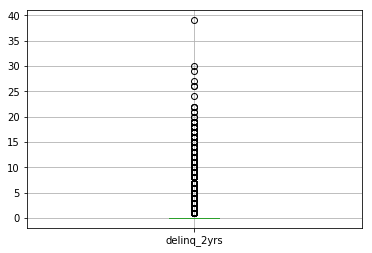

In [35]:
var = 'delinq_2yrs'
print('Number of missing values: ' + str(sum(data[var].isnull())))
print('Number of unique values: ' + str(len(data[var].unique())))
data.boxplot(column = var, return_type = 'axes')

In [36]:
data[var].describe()

count    887350.000000
mean          0.314442
std           0.862244
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          39.000000
Name: delinq_2yrs, dtype: float64

In [37]:
# Impute by median because only 29 missing:
data[var].fillna(0, inplace = True)

### dti

Number of missing values: 0
Number of unique values: 4086


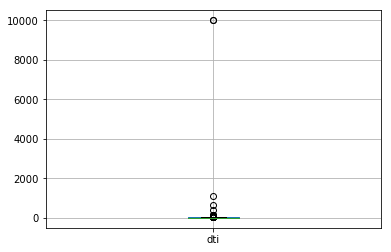

In [38]:
var = 'dti'
print('Number of missing values: ' + str(sum(data[var].isnull())))
print('Number of unique values: ' + str(len(data[var].unique())))
data.boxplot(column = var, return_type = 'axes')

In [39]:
data[var].describe()

count    887379.000000
mean         18.157039
std          17.190626
min           0.000000
25%          11.910000
50%          17.650000
75%          23.950000
max        9999.000000
Name: dti, dtype: float64

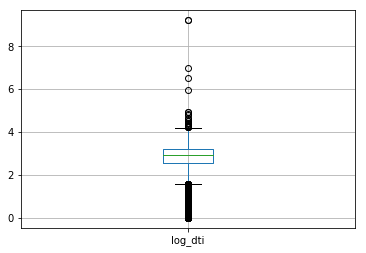

In [40]:
data['log_dti'] = np.log(1 + data[var])
data.boxplot(column = 'log_dti', return_type = 'axes')

In [41]:
data['log_dti'].describe()

count    887379.000000
mean          2.832395
std           0.535684
min           0.000000
25%           2.558002
50%           2.925846
75%           3.216874
max           9.210340
Name: log_dti, dtype: float64

In [42]:
# Drop variable 'dti'
data.drop(var, axis = 1, inplace = True)

### funded_amnt

Number of missing values: 0
Number of unique values: 1372


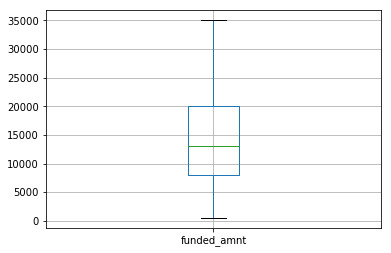

In [43]:
var = 'funded_amnt'
print('Number of missing values: ' + str(sum(data[var].isnull())))
print('Number of unique values: ' + str(len(data[var].unique())))
data.boxplot(column = var, return_type = 'axes')

In [44]:
data[var].describe()

count    887379.000000
mean      14741.877625
std        8429.897657
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: funded_amnt, dtype: float64

### funded_amnt_inv

Number of missing values: 0
Number of unique values: 9864


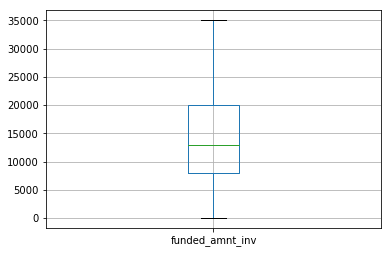

In [45]:
var = 'funded_amnt_inv'
print('Number of missing values: ' + str(sum(data[var].isnull())))
print('Number of unique values: ' + str(len(data[var].unique())))
data.boxplot(column = var, return_type = 'axes')

In [46]:
sum(data['funded_amnt'] != data['funded_amnt_inv'])

100599

In [47]:
sum(data['funded_amnt'] > data['funded_amnt_inv'])

100599

In [48]:
# Have a look at the difference between variables funded_amnt and funded_amnt_inv
diff_in_inv = data['funded_amnt'] - data['funded_amnt_inv']
diff_in_inv.describe()

count    887379.000000
mean         39.413242
std         530.323039
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       32474.996081
dtype: float64

In [49]:
diff_in_inv[diff_in_inv != 0].describe()

count    100599.000000
mean        347.662333
std        1540.675553
min           0.030000
25%          25.000000
50%          50.000000
75%         100.000000
max       32474.996081
dtype: float64

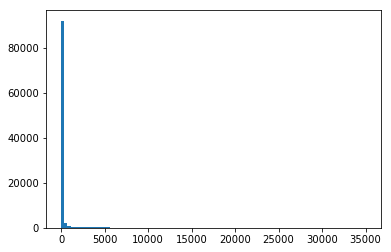

In [50]:
bins = np.linspace(25, 35000, 100)
plt.hist(diff_in_inv, bins = bins)
plt.show()

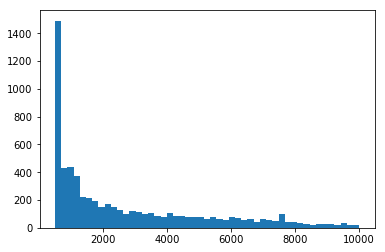

In [51]:
bins = np.linspace(500, 10000, 50)
plt.hist(diff_in_inv[diff_in_inv != 0], bins = bins)
plt.show()

In [52]:
ratio_of_inv = data['funded_amnt_inv'] / data['funded_amnt']
ratio_of_inv.describe()

count    887379.000000
mean          0.996430
std           0.044094
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
dtype: float64

<function matplotlib.pyplot.show>

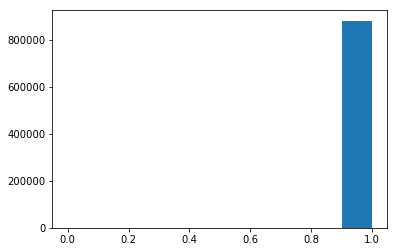

In [53]:
plt.hist(ratio_of_inv)
plt.show

<function matplotlib.pyplot.show>

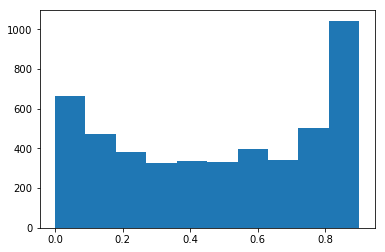

In [54]:
plt.hist(ratio_of_inv[ratio_of_inv < 0.9])
plt.show

In [55]:
# Create a new variable of the ratio_of_inv and drop funded_amnt_inv
data['ratio_of_inv'] = data['funded_amnt_inv'] / data['funded_amnt']
data.drop('funded_amnt_inv', axis = 1, inplace = True)

### inq_last_6mths

Number of missing values: 29
Number of unique values: 29


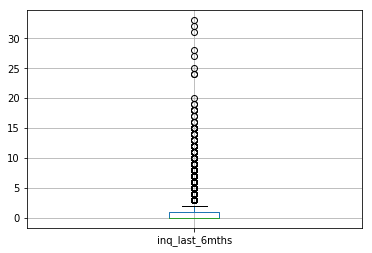

In [56]:
var = 'inq_last_6mths'
print('Number of missing values: ' + str(sum(data[var].isnull())))
print('Number of unique values: ' + str(len(data[var].unique())))
data.boxplot(column = var, return_type = 'axes')

In [57]:
data[var].describe()

count    887350.000000
mean          0.694623
std           0.998448
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          33.000000
Name: inq_last_6mths, dtype: float64

In [58]:
# Impute by median because only 29 missing:
data[var].fillna(0, inplace = True)

### int_rate

Number of missing values: 0
Number of unique values: 542


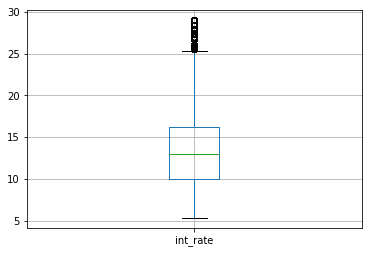

In [59]:
var = 'int_rate'
print('Number of missing values: ' + str(sum(data[var].isnull())))
print('Number of unique values: ' + str(len(data[var].unique())))
data.boxplot(column = var, return_type = 'axes')

### loan_amnt

Number of missing values: 0
Number of unique values: 1372


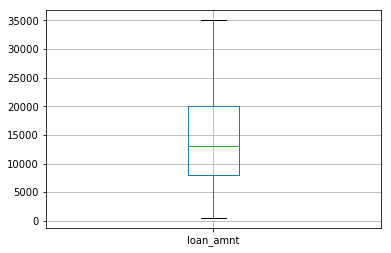

In [60]:
var = 'loan_amnt'
print('Number of missing values: ' + str(sum(data[var].isnull())))
print('Number of unique values: ' + str(len(data[var].unique())))
data.boxplot(column = var, return_type = 'axes')

### mths_since_last_delinq

Number of missing values: 454312
Number of unique values: 156


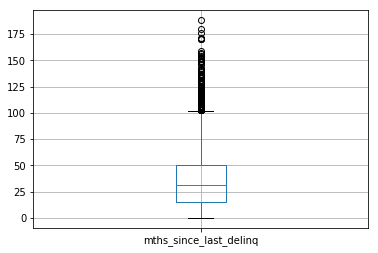

In [61]:
var = 'mths_since_last_delinq'
print('Number of missing values: ' + str(sum(data[var].isnull())))
print('Number of unique values: ' + str(len(data[var].unique())))
data.boxplot(column = var, return_type = 'axes')

In [62]:
data[var].describe()

count    433067.000000
mean         34.063798
std          21.884940
min           0.000000
25%          15.000000
50%          31.000000
75%          50.000000
max         188.000000
Name: mths_since_last_delinq, dtype: float64

In [63]:
# Assume that NaN values refer to cases without delinquency so impute 999 for these cases
data[var].fillna(999.0, inplace = True)

### mths_since_last_major_derog

Number of missing values: 665676
Number of unique values: 169


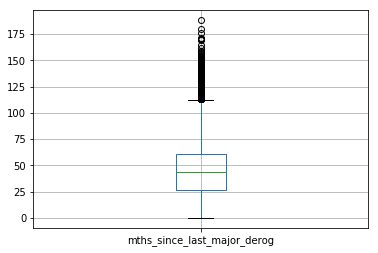

In [64]:
var = 'mths_since_last_major_derog'
print('Number of missing values: ' + str(sum(data[var].isnull())))
print('Number of unique values: ' + str(len(data[var].unique())))
data.boxplot(column = var, return_type = 'axes')

In [65]:
data[var].describe()

count    221703.000000
mean         44.104838
std          22.179841
min           0.000000
25%          27.000000
50%          44.000000
75%          61.000000
max         188.000000
Name: mths_since_last_major_derog, dtype: float64

In [66]:
# Assume that NaN values refer to cases without major derog so impute 999 for these cases
data[var].fillna(999.0, inplace = True)

### mths_since_last_record

Number of missing values: 750326
Number of unique values: 124


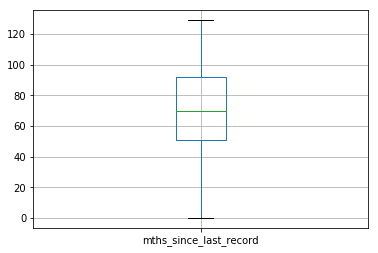

In [67]:
var = 'mths_since_last_record'
print('Number of missing values: ' + str(sum(data[var].isnull())))
print('Number of unique values: ' + str(len(data[var].unique())))
data.boxplot(column = var, return_type = 'axes')

In [68]:
data[var].describe()

count    137053.000000
mean         70.117903
std          28.127914
min           0.000000
25%          51.000000
50%          70.000000
75%          92.000000
max         129.000000
Name: mths_since_last_record, dtype: float64

In [69]:
# Assume that NaN values refer to cases without any record so impute 999 for these cases
data[var].fillna(999.0, inplace = True)

### open_acc

Number of missing values: 29
Number of unique values: 78


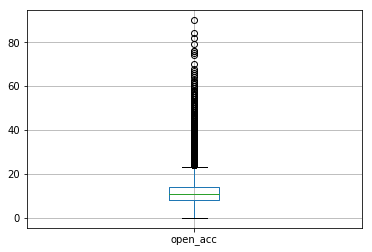

In [70]:
var = 'open_acc'
print('Number of missing values: ' + str(sum(data[var].isnull())))
print('Number of unique values: ' + str(len(data[var].unique())))
data.boxplot(column = var, return_type = 'axes')

In [71]:
data[var].describe()

count    887350.000000
mean         11.548469
std           5.317313
min           0.000000
25%           8.000000
50%          11.000000
75%          14.000000
max          90.000000
Name: open_acc, dtype: float64

In [72]:
# Impute the median because there are only 29 missing values
data[var].fillna(11.0, inplace = True)

### pub_rec

Number of missing values: 29
Number of unique values: 33


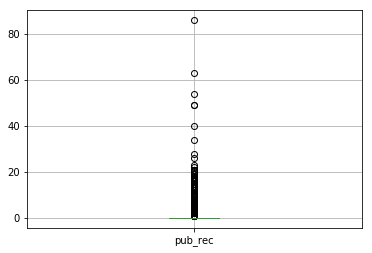

In [73]:
var = 'pub_rec'
print('Number of missing values: ' + str(sum(data[var].isnull())))
print('Number of unique values: ' + str(len(data[var].unique())))
data.boxplot(column = var, return_type = 'axes')

In [74]:
data[var].describe()

count    887350.000000
mean          0.195307
std           0.582091
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          86.000000
Name: pub_rec, dtype: float64

In [75]:
# Impute the median because there are only 29 missing values
data[var].fillna(11.0, inplace = True)

### recoveries

Number of missing values: 0
Number of unique values: 23055


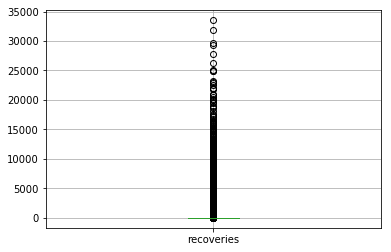

In [76]:
var = 'recoveries'
print('Number of missing values: ' + str(sum(data[var].isnull())))
print('Number of unique values: ' + str(len(data[var].unique())))
data.boxplot(column = var, return_type = 'axes')

In [77]:
data[var].describe()

count    887379.000000
mean         45.919243
std         409.693874
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       33520.270000
Name: recoveries, dtype: float64

In [78]:
sum(data[var] != 0)

24677

### revol_bal

Number of missing values: 0
Number of unique values: 73740


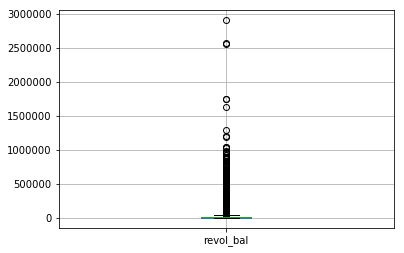

In [79]:
var = 'revol_bal'
print('Number of missing values: ' + str(sum(data[var].isnull())))
print('Number of unique values: ' + str(len(data[var].unique())))
data.boxplot(column = var, return_type = 'axes')

In [80]:
data[var].describe()

count    8.873790e+05
mean     1.692079e+04
std      2.242679e+04
min      0.000000e+00
25%      6.443000e+03
50%      1.187500e+04
75%      2.082900e+04
max      2.904836e+06
Name: revol_bal, dtype: float64

In [81]:
# Create a new variable that measures the ratio of revol_bal and loan_amnt
data['ratio_revolbal_loanamnt'] = data[var] / data['loan_amnt']
data['ratio_revolbal_loanamnt'].describe()

count    887379.000000
mean          1.374659
std           2.179737
min           0.000000
25%           0.594600
50%           0.948235
75%           1.419048
max         269.726000
Name: ratio_revolbal_loanamnt, dtype: float64

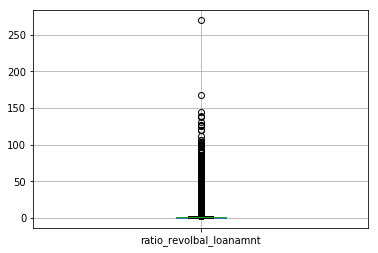

In [82]:
data.boxplot(column = 'ratio_revolbal_loanamnt', return_type = 'axes')

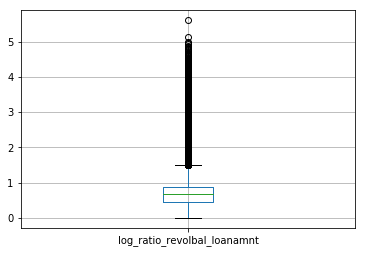

In [83]:
data['log_ratio_revolbal_loanamnt'] = np.log(1 + data['ratio_revolbal_loanamnt'])
data.boxplot(column = 'log_ratio_revolbal_loanamnt', return_type = 'axes')

In [84]:
data['log_ratio_revolbal_loanamnt'].describe()

count    887379.000000
mean          0.731680
std           0.437207
min           0.000000
25%           0.466623
50%           0.666924
75%           0.883374
max           5.601107
Name: log_ratio_revolbal_loanamnt, dtype: float64

In [85]:
# Drop variable ratio_revolbal_loanamnt
data.drop('ratio_revolbal_loanamnt', axis = 1, inplace = True)

### revol_util

Number of missing values: 502
Number of unique values: 1357


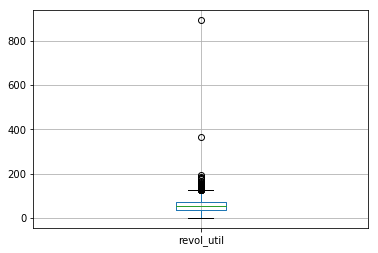

In [86]:
var = 'revol_util'
print('Number of missing values: ' + str(sum(data[var].isnull())))
print('Number of unique values: ' + str(len(data[var].unique())))
data.boxplot(column = var, return_type = 'axes')

In [87]:
data[var].describe()

count    886877.000000
mean         55.067693
std          23.834344
min           0.000000
25%          37.700000
50%          56.000000
75%          73.600000
max         892.300000
Name: revol_util, dtype: float64

In [88]:
# Impute the median because there are only 502 missing values
data[var].fillna(56.0, inplace = True)

### tot_coll_amt

Number of missing values: 70276
Number of unique values: 10326


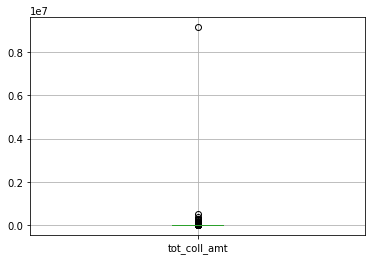

In [89]:
var = 'tot_coll_amt'
print('Number of missing values: ' + str(sum(data[var].isnull())))
print('Number of unique values: ' + str(len(data[var].unique())))
data.boxplot(column = var, return_type = 'axes')

In [90]:
data[var].describe()

count    8.171030e+05
mean     2.257026e+02
std      1.031137e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.152545e+06
Name: tot_coll_amt, dtype: float64

In [91]:
sum(data[var] == 0)

700946

In [92]:
# Create new variable that shows whether tot_coll_amt > 0 (assuming 0 for NaN cases)
data['tot_coll_exist'] = data[var].apply(lambda x: 1 if x > 0 else 0)

In [93]:
# Drop tot_coll_amt
data.drop(var, axis = 1, inplace = True)

### tot_cur_bal

Number of missing values: 70276
Number of unique values: 327343


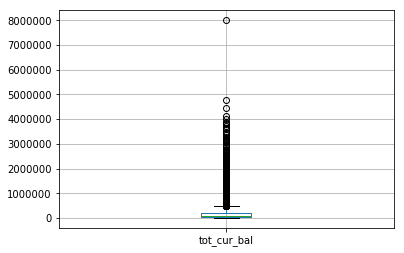

In [94]:
var = 'tot_cur_bal'
print('Number of missing values: ' + str(sum(data[var].isnull())))
print('Number of unique values: ' + str(len(data[var].unique())))
data.boxplot(column = var, return_type = 'axes')

In [95]:
data[var].describe()

count    8.171030e+05
mean     1.394582e+05
std      1.537500e+05
min      0.000000e+00
25%      2.985300e+04
50%      8.055900e+04
75%      2.082050e+05
max      8.000078e+06
Name: tot_cur_bal, dtype: float64

In [96]:
sum(data[var] == 0)

126

In [97]:
# High proportion missing so create a new variable whether present or not
data['tot_cur_bal_exist'] = data[var].apply(lambda x: 0 if pd.isnull(x) else 1)

In [98]:
# Drop variable
data.drop(var, axis = 1, inplace = True)

### total_acc

Number of missing values: 29
Number of unique values: 136


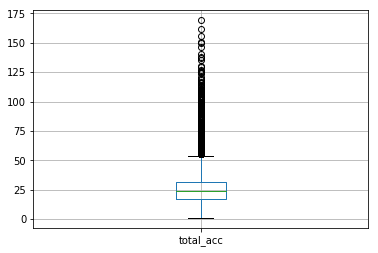

In [99]:
var = 'total_acc'
print('Number of missing values: ' + str(sum(data[var].isnull())))
print('Number of unique values: ' + str(len(data[var].unique())))
data.boxplot(column = var, return_type = 'axes')

In [100]:
data[var].describe()

count    887350.000000
mean         25.268026
std          11.840561
min           1.000000
25%          17.000000
50%          24.000000
75%          32.000000
max         169.000000
Name: total_acc, dtype: float64

In [101]:
# Impute median because only 29 values missing
data[var].fillna(24.0, inplace = True)

### total_rec_int

Number of missing values: 0
Number of unique values: 324635


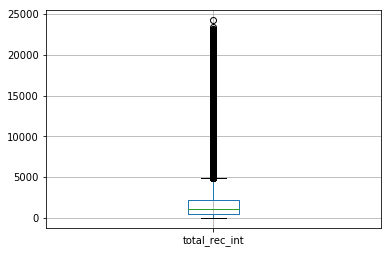

In [102]:
var = 'total_rec_int'
print('Number of missing values: ' + str(sum(data[var].isnull())))
print('Number of unique values: ' + str(len(data[var].unique())))
data.boxplot(column = var, return_type = 'axes')

In [103]:
data[var].describe()

count    887379.000000
mean       1754.804327
std        2095.356099
min           0.000000
25%         441.460000
50%        1073.280000
75%        2238.265000
max       24205.620000
Name: total_rec_int, dtype: float64

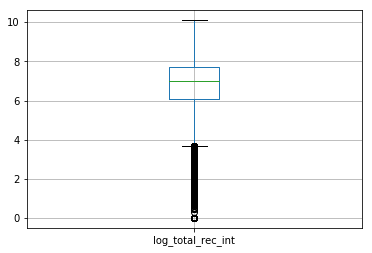

In [104]:
data['log_total_rec_int'] = np.log(1 + data[var])
data.boxplot(column = 'log_total_rec_int', return_type = 'axes')

In [105]:
data['log_total_rec_int'].describe()

count    887379.000000
mean          6.754958
std           1.532066
min           0.000000
25%           6.092350
50%           6.979406
75%           7.713903
max          10.094381
Name: log_total_rec_int, dtype: float64

In [106]:
# Drop variable total_rec_int
data.drop(var, axis = 1, inplace = True)

### total_rec_late_fee

Number of missing values: 0
Number of unique values: 6162


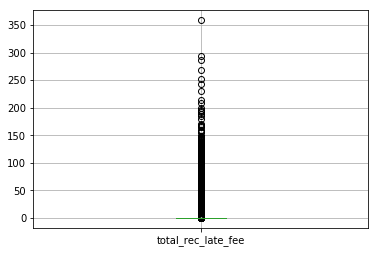

In [107]:
var = 'total_rec_late_fee'
print('Number of missing values: ' + str(sum(data[var].isnull())))
print('Number of unique values: ' + str(len(data[var].unique())))
data.boxplot(column = var, return_type = 'axes')

In [108]:
data[var].describe()

count    887379.000000
mean          0.396692
std           4.087825
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         358.680000
Name: total_rec_late_fee, dtype: float64

In [109]:
sum(data[var] > 0)

12517

### total_rev_hi_lim

Number of missing values: 70276
Number of unique values: 21252


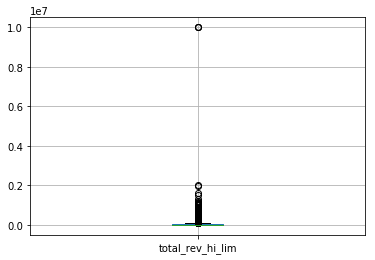

In [110]:
var = 'total_rev_hi_lim'
print('Number of missing values: ' + str(sum(data[var].isnull())))
print('Number of unique values: ' + str(len(data[var].unique())))
data.boxplot(column = var, return_type = 'axes')

In [111]:
data[var].describe()

count    8.171030e+05
mean     3.206862e+04
std      3.749826e+04
min      0.000000e+00
25%      1.390000e+04
50%      2.370000e+04
75%      3.980000e+04
max      9.999999e+06
Name: total_rev_hi_lim, dtype: float64

In [112]:
# High proportion missing so create a new var whether present or not
data['tot_rev_hi_lim_exist'] = data[var].apply(lambda x: 0 if pd.isnull(x) else 1)

In [113]:
# Drop variable
data.drop(var, axis = 1, inplace = True)

## Categorical variables ('object' dtype)

In [114]:
for col in nonnumeric_cols:
    print('\nFrequency count for variable %s'%col)
    print(data[col].value_counts())


Frequency count for variable addr_state
CA    129517
NY     74086
TX     71138
FL     60935
IL     35476
NJ     33256
PA     31393
OH     29631
GA     29085
VA     26255
NC     24720
MI     22985
MD     21031
MA     20593
AZ     20412
WA     19434
CO     18807
MN     15957
MO     14207
IN     13789
CT     13531
TN     12887
NV     12443
WI     11574
AL     11200
OR     10893
SC     10639
LA     10587
KY      8550
OK      8085
KS      7926
AR      6640
UT      6264
NM      4939
HI      4570
WV      4386
NH      4294
RI      3893
MS      3819
MT      2558
DE      2511
DC      2432
AK      2205
WY      2028
SD      1815
VT      1797
NE      1176
ME       525
ND       479
IA        14
ID        12
Name: addr_state, dtype: int64

Frequency count for variable application_type
INDIVIDUAL    886868
JOINT            511
Name: application_type, dtype: int64

Frequency count for variable emp_length
10+ years    291569
2 years       78870
< 1 year      70605
3 years       70026
1 year        5709

In [115]:
# Number of unique levels for categorical variables
for col in nonnumeric_cols:
    print(col + ' ' +str(len(data[col].unique())))

addr_state 51
application_type 2
emp_length 12
grade 7
home_ownership 6
initial_list_status 2
last_week_pay 98
purpose 14
pymnt_plan 2
sub_grade 35
term 2
verification_status 3
verification_status_joint 4
zip_code 935


In [116]:
# Check for missing values
data[nonnumeric_cols].apply(lambda x: sum(x.isnull()))

addr_state                        0
application_type                  0
emp_length                        0
grade                             0
home_ownership                    0
initial_list_status               0
last_week_pay                     0
purpose                           0
pymnt_plan                        0
sub_grade                         0
term                              0
verification_status               0
verification_status_joint    886868
zip_code                          0
dtype: int64

In [117]:
print(data['verification_status_joint'].value_counts())

Not Verified       283
Verified           167
Source Verified     61
Name: verification_status_joint, dtype: int64


In [118]:
print(data['application_type'].value_counts())

INDIVIDUAL    886868
JOINT            511
Name: application_type, dtype: int64


In [119]:
# Impute 'not applied' for 'verification_status_joint'
data['verification_status_joint'].fillna('not applied', inplace = True)

# Drop application_type because it's substituted with verification_status_joint
data.drop('application_type', axis = 1, inplace = True)

## Transform some categorical variables into numeric ones

In [120]:
nonnumeric_cols = data.dtypes[data.dtypes == 'object'].index.copy()
numeric_cols = data.dtypes[data.dtypes != 'object'].index.copy()
print(nonnumeric_cols)
print(numeric_cols)

Index(['addr_state', 'emp_length', 'grade', 'home_ownership',
       'initial_list_status', 'last_week_pay', 'purpose', 'pymnt_plan',
       'sub_grade', 'term', 'verification_status', 'verification_status_joint',
       'zip_code'],
      dtype='object')
Index(['collection_recovery_fee', 'collections_12_mths_ex_med', 'delinq_2yrs',
       'funded_amnt', 'inq_last_6mths', 'int_rate', 'istrain', 'loan_amnt',
       'loan_status', 'member_id', 'mths_since_last_delinq',
       'mths_since_last_major_derog', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'recoveries', 'revol_bal', 'revol_util', 'total_acc',
       'total_rec_late_fee', 'log_annual_inc', 'log_dti', 'ratio_of_inv',
       'log_ratio_revolbal_loanamnt', 'tot_coll_exist', 'tot_cur_bal_exist',
       'log_total_rec_int', 'tot_rev_hi_lim_exist'],
      dtype='object')


In [121]:
for col in nonnumeric_cols:
    print('\nFrequency count for variable %s'%col)
    print(data[col].value_counts())


Frequency count for variable addr_state
CA    129517
NY     74086
TX     71138
FL     60935
IL     35476
NJ     33256
PA     31393
OH     29631
GA     29085
VA     26255
NC     24720
MI     22985
MD     21031
MA     20593
AZ     20412
WA     19434
CO     18807
MN     15957
MO     14207
IN     13789
CT     13531
TN     12887
NV     12443
WI     11574
AL     11200
OR     10893
SC     10639
LA     10587
KY      8550
OK      8085
KS      7926
AR      6640
UT      6264
NM      4939
HI      4570
WV      4386
NH      4294
RI      3893
MS      3819
MT      2558
DE      2511
DC      2432
AK      2205
WY      2028
SD      1815
VT      1797
NE      1176
ME       525
ND       479
IA        14
ID        12
Name: addr_state, dtype: int64

Frequency count for variable emp_length
10+ years    291569
2 years       78870
< 1 year      70605
3 years       70026
1 year        57095
5 years       55704
4 years       52529
n/a           44825
7 years       44594
8 years       43955
6 years       42950
9 ye

In [122]:
# Create a new numerical variable for emp_length (value -1 refers to the case of emp_length!='n/a')
data['emp_length_num'] = data['emp_length'].apply(lambda x: -1 if x == 'n/a' else 0 if x == '< 1 year' 
                                                  else 10 if x == '10+ years' else int(x[0]))
# Drop variable emp_length
data.drop('emp_length', axis = 1, inplace = True)

In [123]:
aver_ints = {}
for subgrade in data['sub_grade'].unique():
    aver_ints[subgrade] = np.mean(data[data['sub_grade'] == subgrade]['int_rate'])
sorted_aver_ints = sorted(aver_ints.items(), key=operator.itemgetter(1))

for idx in range(len(sorted_aver_ints)):
    print(sorted_aver_ints[idx])

('A1', 5.712018504779583)
('A2', 6.425859017122811)
('A3', 7.141020164555867)
('A4', 7.529181315340288)
('A5', 8.269619555522203)
('B1', 8.948791247884262)
('B2', 9.996643365244365)
('B3', 10.900791861223762)
('B4', 11.744866249589949)
('B5', 12.26916900456938)
('C1', 12.892131605072835)
('C2', 13.423569760311706)
('C3', 14.015993700281465)
('C4', 14.598234643959731)
('C5', 15.31815279361602)
('D1', 16.079182625968738)
('D2', 16.847392544369516)
('D3', 17.340907207949822)
('D4', 17.903247124191484)
('D5', 18.417205105421164)
('E1', 18.827669695641326)
('E2', 19.373988473298724)
('E3', 19.968241828215525)
('E4', 20.780979187988954)
('E5', 21.680796866839877)
('F1', 22.606217788860455)
('F2', 23.316743323443458)
('F3', 23.970559440559956)
('F4', 24.4894925198009)
('F5', 24.99890902081706)
('G1', 25.45769107429193)
('G4', 25.622428355957684)
('G2', 25.675672389128035)
('G5', 25.693454861110986)
('G3', 25.842976554535987)


In [124]:
# Transform sub_grade into numeric variable
# Assume order A1 < A2 < A3 < A4 < A5 < B1 < B2 < B3 < B4 < B5 < C1 < C2 < ... < E4 < E5
# (This assumption is based on the average interest rates for each subgrade.)
data['grade_multiplicator'] = data['grade'].apply(lambda x: 1 if x == 'A' else 2 if x == 'B' else 
                                                  3 if x == 'C' else 4 if x == 'D' else 
                                                  5 if x == 'E' else 6 if x == 'F' else 7)
data['subgrade_plus'] = data['sub_grade'].apply(lambda x: int(str(x)[-1]))
data['subgrade_num'] = data['grade_multiplicator'] * 5 + data['subgrade_plus']
# Drop variables grade, sub_grade, grade_multiplicator, subgrade_plus
data.drop('grade', axis = 1, inplace = True)
data.drop('sub_grade', axis = 1, inplace = True)
data.drop('grade_multiplicator', axis = 1, inplace = True)
data.drop('subgrade_plus', axis = 1, inplace = True)

In [125]:
data['last_week_pay'].unique()

array(['26th week', '9th week', '135th week', '96th week', '113th week',
       '117th week', '78th week', '44th week', '52th week', '95th week',
       '48th week', '82th week', '35th week', '104th week', '17th week',
       '13th week', 'NAth week', '31th week', '30th week', '70th week',
       '4th week', '91th week', '65th week', '39th week', '83th week',
       '74th week', '22th week', '61th week', '156th week', '122th week',
       '174th week', '87th week', '139th week', '0th week', '57th week',
       '131th week', '152th week', '43th week', '161th week', '56th week',
       '170th week', '157th week', '109th week', '126th week',
       '100th week', '148th week', '265th week', '165th week',
       '261th week', '213th week', '222th week', '196th week',
       '130th week', '144th week', '244th week', '204th week', '69th week',
       '217th week', '143th week', '191th week', '21th week', '226th week',
       '18th week', '108th week', '79th week', '183th week', '178th week',


In [126]:
sum(data['last_week_pay'] == 'NAth week')

17659

In [127]:
# Assume that 'NAth week' means '0th week'
data['last_week_pay'] = data['last_week_pay'].apply(lambda x: '0th week' if x == 'NAth week' else x)

In [128]:
# Transform last_week_pay into numeric variable
data['last_week_pay_num'] = data['last_week_pay'].apply(lambda x: int(str(x)[ : -7]))
# Drop last_week_pay
data.drop('last_week_pay', axis = 1, inplace = True)

In [129]:
# Drop pymnt_plan because of almost same values
data.drop('pymnt_plan', axis = 1, inplace = True)

In [130]:
# Create variable that shows only the first digit of the zip code (which refers to groups of states)
data['zip'] = data['zip_code'].apply(lambda x: int(str(x)[0]))
# Drop zip_code
data.drop('zip_code', axis = 1, inplace = True)
len(data['zip'].unique())

10

## Check for missing values

In [131]:
# Check for missing values
data.apply(lambda x: sum(x.isnull()))

addr_state                          0
collection_recovery_fee             0
collections_12_mths_ex_med          0
delinq_2yrs                         0
funded_amnt                         0
home_ownership                      0
initial_list_status                 0
inq_last_6mths                      0
int_rate                            0
istrain                             0
loan_amnt                           0
loan_status                    354951
member_id                           0
mths_since_last_delinq              0
mths_since_last_major_derog         0
mths_since_last_record              0
open_acc                            0
pub_rec                             0
purpose                             0
recoveries                          0
revol_bal                           0
revol_util                          0
term                                0
total_acc                           0
total_rec_late_fee                  0
verification_status                 0
verification

In [132]:
data.head()

,addr_state,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,funded_amnt,home_ownership,initial_list_status,inq_last_6mths,int_rate,istrain,...,ratio_of_inv,log_ratio_revolbal_loanamnt,tot_coll_exist,tot_cur_bal_exist,log_total_rec_int,tot_rev_hi_lim_exist,emp_length_num,subgrade_num,last_week_pay_num,zip
0,FL,0.0,0.0,0.0,14350,OWN,f,1.0,19.19,1,...,1.0,0.943513,0,1,7.068887,1,9,28,26,3
1,MD,0.0,0.0,0.0,4800,MORTGAGE,w,1.0,10.99,1,...,1.0,0.951014,0,1,4.442063,1,0,14,9,2
2,OH,0.0,0.0,0.0,10000,OWN,w,0.0,7.26,1,...,1.0,0.736063,1,1,4.051263,1,2,9,9,4
3,VA,0.0,0.0,0.0,15000,RENT,f,2.0,19.72,1,...,1.0,0.649265,0,1,8.488716,1,10,25,135,2
4,CA,0.0,0.0,0.0,16000,RENT,w,0.0,10.64,1,...,1.0,1.175477,0,1,7.739538,1,10,12,96,9


## One-hot encoding

In [133]:
# Update the lists of nonnumeric and numeric cols
nonnumeric_cols = data.dtypes[data.dtypes == 'object'].index.copy()
numeric_cols = data.dtypes[data.dtypes != 'object'].index.copy()
print(nonnumeric_cols)
print(numeric_cols)

Index(['addr_state', 'home_ownership', 'initial_list_status', 'purpose',
       'term', 'verification_status', 'verification_status_joint'],
      dtype='object')
Index(['collection_recovery_fee', 'collections_12_mths_ex_med', 'delinq_2yrs',
       'funded_amnt', 'inq_last_6mths', 'int_rate', 'istrain', 'loan_amnt',
       'loan_status', 'member_id', 'mths_since_last_delinq',
       'mths_since_last_major_derog', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'recoveries', 'revol_bal', 'revol_util', 'total_acc',
       'total_rec_late_fee', 'log_annual_inc', 'log_dti', 'ratio_of_inv',
       'log_ratio_revolbal_loanamnt', 'tot_coll_exist', 'tot_cur_bal_exist',
       'log_total_rec_int', 'tot_rev_hi_lim_exist', 'emp_length_num',
       'subgrade_num', 'last_week_pay_num', 'zip'],
      dtype='object')


In [134]:
# check for number of categories in nonnumerical columns
for col in nonnumeric_cols:
    print(col + ' ' + str(len(data[col].unique())))

addr_state 51
home_ownership 6
initial_list_status 2
purpose 14
term 2
verification_status 3
verification_status_joint 4


In [135]:
data = pd.get_dummies(data)

In [136]:
data.dtypes

collection_recovery_fee                      float64
collections_12_mths_ex_med                   float64
delinq_2yrs                                  float64
funded_amnt                                    int64
inq_last_6mths                               float64
int_rate                                     float64
istrain                                        int64
loan_amnt                                      int64
loan_status                                  float64
member_id                                      int64
mths_since_last_delinq                       float64
mths_since_last_major_derog                  float64
mths_since_last_record                       float64
open_acc                                     float64
pub_rec                                      float64
recoveries                                   float64
revol_bal                                    float64
revol_util                                   float64
total_acc                                    f

In [137]:
data.shape

(887379, 114)

In [138]:
data.columns

Index(['collection_recovery_fee', 'collections_12_mths_ex_med', 'delinq_2yrs',
       'funded_amnt', 'inq_last_6mths', 'int_rate', 'istrain', 'loan_amnt',
       'loan_status', 'member_id',
       ...
       'purpose_wedding', 'term_36 months', 'term_60 months',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'verification_status_joint_Not Verified',
       'verification_status_joint_Source Verified',
       'verification_status_joint_Verified',
       'verification_status_joint_not applied'],
      dtype='object', length=114)

In [139]:
data.head()

,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,funded_amnt,inq_last_6mths,int_rate,istrain,loan_amnt,loan_status,member_id,...,purpose_wedding,term_36 months,term_60 months,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified,verification_status_joint_not applied
0,0.0,0.0,0.0,14350,1.0,19.19,1,14350,0.0,58189336,...,0,1,0,0,1,0,0,0,0,1
1,0.0,0.0,0.0,4800,1.0,10.99,1,4800,0.0,70011223,...,0,1,0,0,1,0,0,0,0,1
2,0.0,0.0,0.0,10000,0.0,7.26,1,10000,0.0,70255675,...,0,1,0,1,0,0,0,0,0,1
3,0.0,0.0,0.0,15000,2.0,19.72,1,15000,0.0,1893936,...,0,1,0,1,0,0,0,0,0,1
4,0.0,0.0,0.0,16000,0.0,10.64,1,16000,0.0,7652106,...,0,1,0,0,0,1,0,0,0,1


## Separate train and test

In [141]:
train = data[data['istrain'] == 1]
test = data[data['istrain'] == 0]
train.drop('istrain', axis = 1, inplace = True)
test.drop('istrain', axis = 1, inplace = True)

# Split the training data into training and validation set
msk = np.random.rand(len(train)) < 0.8
valid = train[~msk]
train = train[msk]

train.to_csv(TRAIN_ONEHOT, sep = ',', index = False)
valid.to_csv(VALID_ONEHOT, sep = ',', index = False)

test.drop('loan_status', axis = 1, inplace = True)
test.to_csv(TEST_ONEHOT, sep = ',', index = False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
